In [503]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
import numpy as np
import plotly.graph_objects as go
import spacy
import nltk
warnings.filterwarnings('ignore')

In [504]:
!pip install haversine
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [505]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [506]:
df1 = pd.read_csv('/content/drive/MyDrive/Sample 2_Airbnb_listings.csv')
df_listings=pd.DataFrame(df1,columns=['id','accommodates','price','amenities','neighbourhood_cleansed','review_scores_rating'])
def format_price(colnm):
  return int(float(colnm.replace('$','').replace(',','')))
df_listings['price']=df_listings['price'].apply(format_price)
df_listings.head()

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating
0,43920083,5,128,"[""Board games"", ""Kitchen"", ""Baby bath"", ""Dishw...",Lambeth,100.0
1,15262253,1,70,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...",Westminster,91.0
2,392246,2,39,"[""Dishwasher"", ""Kitchen"", ""Bed linens"", ""Hange...",Greenwich,99.0
3,30054179,3,85,"[""TV"", ""Essentials"", ""Kitchen"", ""Free parking ...",Lambeth,NaN
4,29098736,1,40,"[""Washer \u2013\u00a0In unit"", ""Bed linens"", ""...",Wandsworth,100.0


In [543]:
y=df_listings[df_listings['id']==14300858]
y

,id,accommodates,price,amenities,neighbourhood_cleansed,review_scores_rating,amen_as_list,amenities_list
10749,14300858,4,67,"[""Kitchen"", ""Bed linens"", ""Hangers"", ""Smart lo...",Kensington and Chelsea,89.0,"[Kitchen, Bed linens, Hangers, Smart lock, Fir...","[Kitchen, Bed linens, Hangers, Smart lock, Fir..."


In [508]:
df_listings.shape

(30000, 6)

In [509]:
df_listings['neighbourhood_cleansed']

0                       Lambeth
1                   Westminster
2                     Greenwich
3                       Lambeth
4                    Wandsworth
                  ...          
29995    Kensington and Chelsea
29996                 Southwark
29997                    Ealing
29998    Kensington and Chelsea
29999                   Hackney
Name: neighbourhood_cleansed, Length: 30000, dtype: object

In [510]:
df_listings.dtypes

id                          int64
accommodates                int64
price                       int64
amenities                  object
neighbourhood_cleansed     object
review_scores_rating      float64
dtype: object

In [511]:
df_listings.isnull().sum()
df_listings= df_listings.fillna(0)


In [512]:
amen = df_listings['amenities'].unique()
import ast
def Lis(x):
    arr = ast.literal_eval(x)
    return arr

Lis("['Hello']")

df_listings['amen_as_list'] = df_listings['amenities'].apply(Lis)
df_listings['amen_as_list']
amenities = {}

for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if(df_listings['amen_as_list'][i][j] not in amenities):
            amenities[(df_listings['amen_as_list'][i][j])] = 1
        else:
            amenities[(df_listings['amen_as_list'][i][j])] += 1
amenities

{'Board games': 53,
 'Kitchen': 27029,
 'Baby bath': 282,
 'Dishwasher': 7000,
 'Bed linens': 10568,
 'Dining table': 471,
 'Hangers': 23232,
 'Private entrance': 7194,
 'Fire extinguisher': 9665,
 'Bathtub': 2972,
 'Long term stays allowed': 24727,
 'Wine glasses': 436,
 'Wifi': 28564,
 'Carbon monoxide alarm': 17390,
 'Heating': 27857,
 'Essentials': 27355,
 'Washer': 25071,
 'Microwave': 10419,
 'Hair dryer': 19899,
 'Freezer': 1103,
 'Dedicated workspace': 18146,
 'Hot water kettle': 706,
 'Refrigerator': 12387,
 'Iron': 22226,
 'Conditioner': 647,
 'Extra pillows and blankets': 5203,
 'Cooking basics': 11334,
 'Mini fridge': 239,
 'Cleaning before checkout': 862,
 'Oven': 10933,
 'Shampoo': 19150,
 'Hot water': 16991,
 'Lockbox': 3482,
 'Dishes and silverware': 12207,
 'Stove': 9850,
 'Crib': 1248,
 'Shower gel': 2496,
 'TV': 17471,
 'Cleaning products': 484,
 'Luggage dropoff allowed': 4374,
 'Cable TV': 4409,
 'Children’s books and toys for ages 0-2 years old, 2-5 years old, 5-1

In [513]:
#new_dict = [(key, value) for value, key in amenities.items()]
#dict(new_dict)
new_amen = sorted(amenities.items(), key = lambda x: x[1])

In [514]:
new_amen[-25:]


[('First aid kit', 9446),
 ('Fire extinguisher', 9665),
 ('Stove', 9850),
 ('Microwave', 10419),
 ('Bed linens', 10568),
 ('Oven', 10933),
 ('Cooking basics', 11334),
 ('Dishes and silverware', 12207),
 ('Refrigerator', 12387),
 ('Dryer', 12922),
 ('Hot water', 16991),
 ('Carbon monoxide alarm', 17390),
 ('TV', 17471),
 ('Dedicated workspace', 18146),
 ('Shampoo', 19150),
 ('Hair dryer', 19899),
 ('Iron', 22226),
 ('Hangers', 23232),
 ('Long term stays allowed', 24727),
 ('Washer', 25071),
 ('Smoke alarm', 25447),
 ('Kitchen', 27029),
 ('Essentials', 27355),
 ('Heating', 27857),
 ('Wifi', 28564)]

In [515]:
newDict = []
for i in range(15,25):
    newDict.append(new_amen[-50:][i][0])
newDict

['Luggage dropoff allowed',
 'Cable TV',
 'Host greets you',
 'Lock on bedroom door',
 'Extra pillows and blankets',
 'Free parking on premises',
 'Elevator',
 'Coffee maker',
 'Dishwasher',
 'Private entrance']

In [516]:
dnew = pd.DataFrame()
dnew['scores'] = df_listings['review_scores_rating']
dnew=dnew.fillna(dnew.mean())
dnew

,scores
0,100.0
1,91.0
2,99.0
3,0.0
4,100.0
...,...
29995,80.0
29996,98.0
29997,89.0
29998,94.0


In [517]:
for i in newDict:
    dnew[i] = 0

dnew

,scores,Luggage dropoff allowed,Cable TV,Host greets you,Lock on bedroom door,Extra pillows and blankets,Free parking on premises,Elevator,Coffee maker,Dishwasher,Private entrance
0,100.0,0,0,0,0,0,0,0,0,0,0
1,91.0,0,0,0,0,0,0,0,0,0,0
2,99.0,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,0
4,100.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,80.0,0,0,0,0,0,0,0,0,0,0
29996,98.0,0,0,0,0,0,0,0,0,0,0
29997,89.0,0,0,0,0,0,0,0,0,0,0
29998,94.0,0,0,0,0,0,0,0,0,0,0


In [518]:
for i in df_listings['amen_as_list'].index:
    for j in range(len(df_listings['amen_as_list'][i])):
        if df_listings['amen_as_list'][i][j] in newDict:
            dnew[df_listings['amen_as_list'][i][j]][i] = 1

dnew

,scores,Luggage dropoff allowed,Cable TV,Host greets you,Lock on bedroom door,Extra pillows and blankets,Free parking on premises,Elevator,Coffee maker,Dishwasher,Private entrance
0,100.0,1,1,0,0,1,0,0,0,1,1
1,91.0,1,0,1,1,0,0,1,0,0,0
2,99.0,1,0,0,0,1,1,0,0,1,0
3,0.0,0,0,0,1,0,1,0,0,0,0
4,100.0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,80.0,0,0,0,0,0,0,0,0,0,1
29996,98.0,0,0,0,0,0,1,1,0,0,0
29997,89.0,0,0,0,1,0,0,0,0,0,0
29998,94.0,0,0,0,0,1,0,0,0,0,0


In [519]:
from sklearn.ensemble import ExtraTreesClassifier
etf = ExtraTreesClassifier()

X = dnew.drop(labels = ['scores'], axis = 1)
y = dnew['scores']

etf.fit(X, y)

ExtraTreesClassifier()

In [520]:
feature_importance = etf.feature_importances_
feature_importance

array([0.0946152 , 0.07285495, 0.14299111, 0.07229381, 0.11155697,
       0.06995355, 0.07244725, 0.1898912 , 0.10219187, 0.07120409])

In [521]:
for i in range(10):
    feature_importance[i] = feature_importance[i]*100

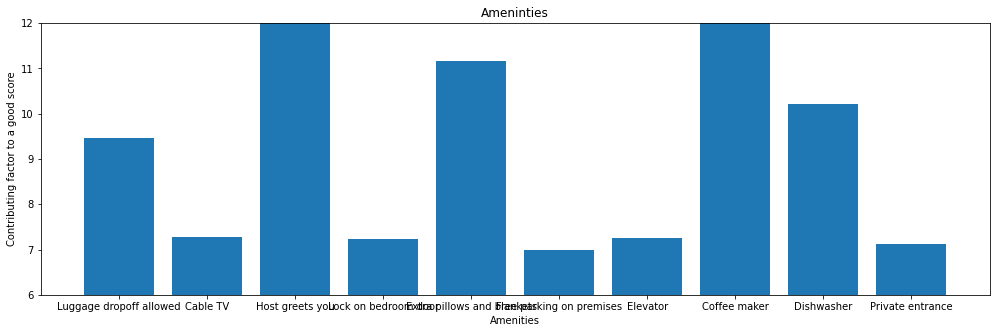

In [522]:
fig = plt.figure(figsize=(17, 5))
plt.ylim(6,12)
plt.bar(newDict, feature_importance)
plt.xlabel('Amenities')
plt.ylabel('Contributing factor to a good score')
plt.title('Ameninties')
plt.show()

In [538]:
#remove the NAN values 
df_listings.dropna(how='any',inplace=True)
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7078 entries, 1 to 29998
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7078 non-null   int64  
 1   accommodates            7078 non-null   int64  
 2   price                   7078 non-null   int64  
 3   amenities               7078 non-null   object 
 4   neighbourhood_cleansed  7078 non-null   object 
 5   review_scores_rating    7078 non-null   float64
 6   amen_as_list            7078 non-null   object 
 7   amenities_list          7078 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 497.7+ KB


In [524]:
df_listings=df_listings[df_listings['accommodates']<=4]


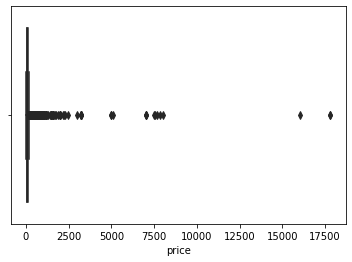

In [525]:
boxplot = sns.boxplot(x='price',data=df_listings,color='green')

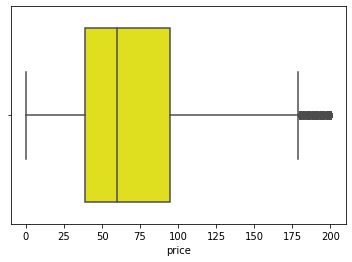

In [526]:

df_listings_boxplot = df_listings[df_listings['price'] <= 200]

boxplot2 = sns.boxplot(x='price', data=df_listings_boxplot, color='yellow')


In [527]:
df_listings.price.quantile([0.25,0.5,0.75,1])

0.25       40.0
0.50       65.0
0.75      100.0
1.00    17806.0
Name: price, dtype: float64

In [539]:
df_listings=df_listings[df_listings['price'].between(40,100)]
df_listings.shape[0]

7078

In [540]:
import json
df_listings['amenities_list'] = df_listings['amenities'].apply(lambda y: json.dumps(y))
df_listings[['amenities','amenities_list']].head()


,amenities,amenities_list
1,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...","""[\""Kitchen\"", \""Host greets you\"", \""Hangers\..."
6,"[""Essentials"", ""Kitchen"", ""Washer"", ""Elevator""...","""[\""Essentials\"", \""Kitchen\"", \""Washer\"", \""E..."
7,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Pri...","""[\""Kitchen\"", \""Host greets you\"", \""Hangers\..."
8,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...","""[\""TV\"", \""Essentials\"", \""Kitchen\"", \""Washe..."
12,"[""Essentials"", ""Kitchen"", ""Washer"", ""Hair drye...","""[\""Essentials\"", \""Kitchen\"", \""Washer\"", \""H..."


In [541]:
import json

def parse_amenities(amenities_json):
    amenities = json.loads(amenities_json)
    return amenities

df_listings['amenities_list'] = df_listings['amenities'].apply(parse_amenities)
df_listings[['amenities', 'amenities_list']].head()


,amenities,amenities_list
1,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Fir...","[Kitchen, Host greets you, Hangers, Fire extin..."
6,"[""Essentials"", ""Kitchen"", ""Washer"", ""Elevator""...","[Essentials, Kitchen, Washer, Elevator, Long t..."
7,"[""Kitchen"", ""Host greets you"", ""Hangers"", ""Pri...","[Kitchen, Host greets you, Hangers, Private en..."
8,"[""TV"", ""Essentials"", ""Kitchen"", ""Washer"", ""Han...","[TV, Essentials, Kitchen, Washer, Hangers, Pri..."
12,"[""Essentials"", ""Kitchen"", ""Washer"", ""Hair drye...","[Essentials, Kitchen, Washer, Hair dryer, Hang..."


In [531]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
amenities_binary=mlb.fit_transform(df_listings['amen_as_list'])
amenities_binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [532]:
x_data=pd.DataFrame(amenities_binary , columns=mlb.classes_,index=df_listings.id)
x_data.head()

,"32"" HDTV with Netflix, standard cable","32"" TV with Netflix","32"" TV with standard cable","34"" HDTV with Netflix","39"" TV","42"" TV with Netflix","47"" HDTV with standard cable","49"" HDTV with Netflix, Amazon Prime Video, premium cable","50"" HDTV","50"" HDTV with standard cable",...,Wifi – 76 Mbps,Window AC unit,Window guards,Wine glasses,Zanussi electric stove,bosh refrigerator,built in refrigerator,marshall sound system with Bluetooth and aux,own body soap,smeg refrigerator
id,,,,,,,,,,,,,,,,,,,,,
15262253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4815852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47933756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37015208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3338480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [533]:
x_final=x_data[x_data.columns[x_data.sum()>x_data.sum().mean()]]
df_amenities=pd.DataFrame(x_final.sum())
df_amenities.columns=['counts']
from sklearn.cluster import KMeans
s=KMeans(n_clusters=4).fit_predict(df_amenities['counts'].values.reshape(-1,1))
df_amenities['availability_cluster']=s
df_amenities=df_amenities.sort_values(by=['availability_cluster','counts'],ascending=False)
df_amenities


,counts,availability_cluster
Iron,4961,3
Hair dryer,4564,3
Shampoo,4553,3
Dedicated workspace,4141,3
TV,3957,3
Carbon monoxide alarm,3904,3
Hot water,3895,3
Private entrance,1568,2
Elevator,1393,2
Free parking on premises,1321,2


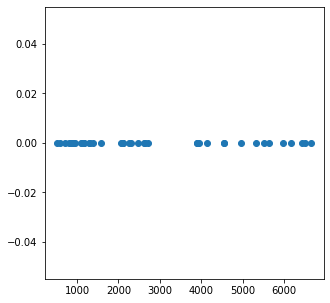

In [534]:
plt.figure(figsize=(5,5))
plt.scatter(df_amenities['counts'], np.zeros(df_amenities.shape[0]))
plt.show()


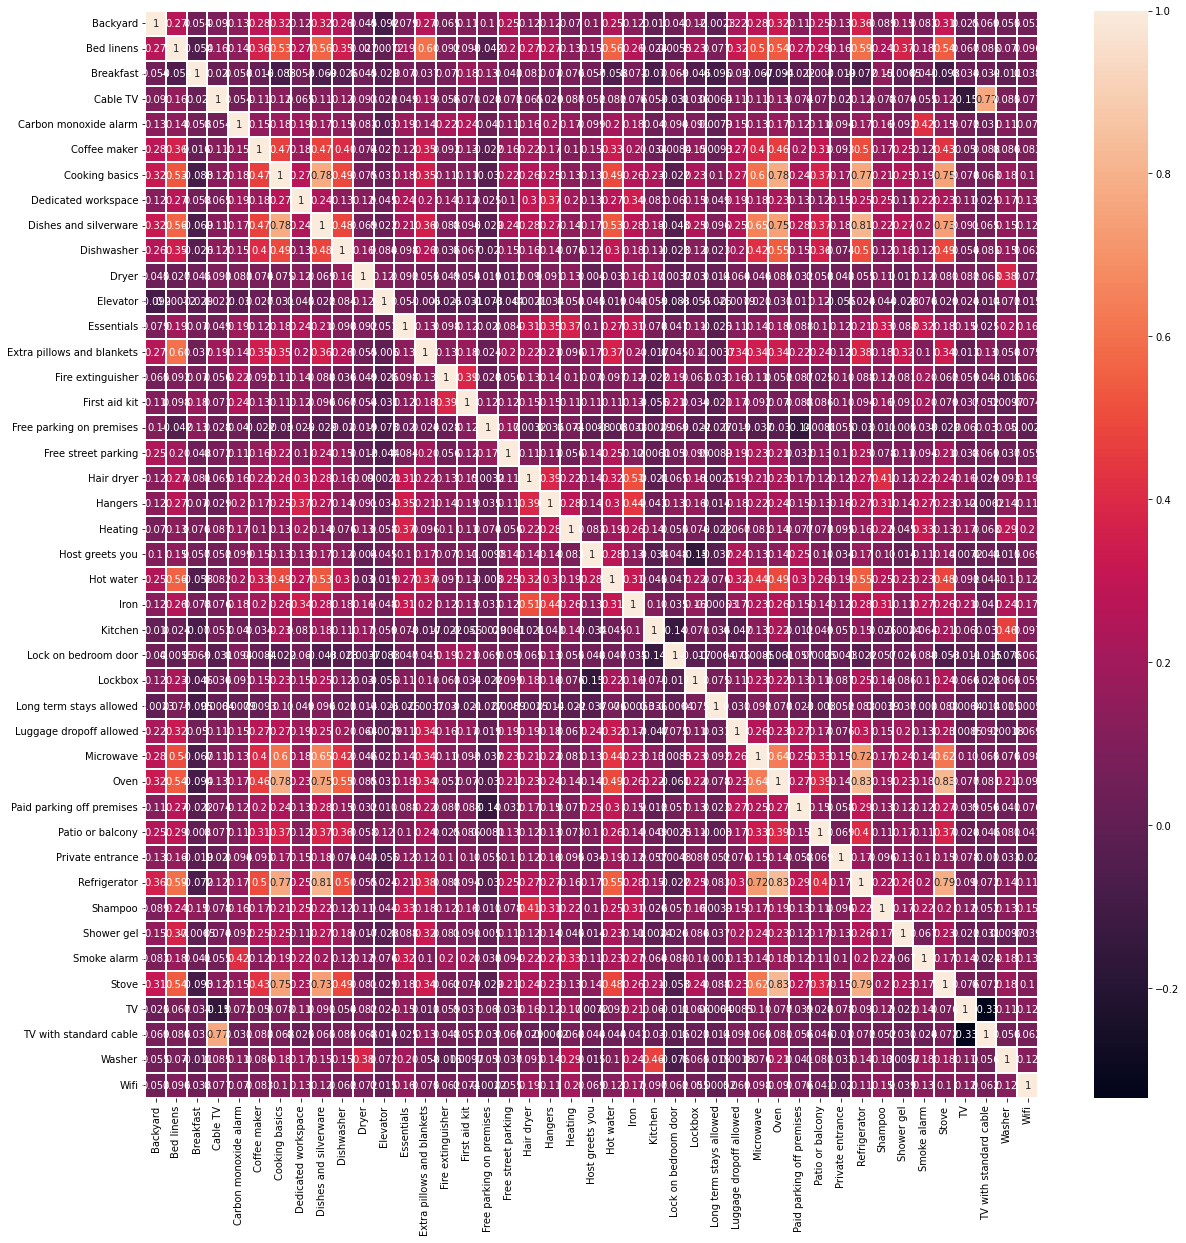

In [535]:
corr=x_final.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths=1)
plt.show()

In [536]:
xx=x_final.copy()
xx['lessential_amen']=xx['Wifi']+xx['Heating']+xx['Essentials']+xx['Kitchen']+xx['Smoke alarm']+xx['Washer']+xx['Long term stays allowed']+xx['Hangers']
xx['2common_amen']=xx['Iron']+xx['Shampoo']+xx['Hair dryer']+xx['Dedicated workspace']+xx['Carbon monoxide alarm']+xx['TV']
xx['3upgraded_amen']=xx['Refrigerator']+xx['Dishes and silverware']+xx['Cooking basics']+xx['Oven']+xx['Microwave']+xx['Stove']+xx['Dryer']+xx['Bed linens']+xx['First aid kit']+xx['Fire extinguisher']
xx['4other_amen']=xx['Private entrance']+xx['Lock on bedroom door']+xx['Elevator']+xx['Coffee maker']+xx['Host greets you']
cols=['lessential_amen','2common_amen','3upgraded_amen','4other_amen']
x_reduce=pd.DataFrame(xx,columns=cols)
x_reduce.head()






,lessential_amen,2common_amen,3upgraded_amen,4other_amen
id,,,,
15262253,8,5,3,3
4815852,6,0,1,1
47933756,8,6,3,2
37015208,6,3,1,2
3338480,7,4,1,1


        lessential_amen 2common_amen 3upgraded_amen 4other_amen
                   mean         mean           mean        mean
cluster                                                        
0              6.429496     3.160196       1.155734    0.672691
1              7.489599     4.590139       6.998074    1.358243
            id  lessential_amen  2common_amen  3upgraded_amen  4other_amen  \
2574  14300858                8             4               7            0   

      cluster  
2574        1  


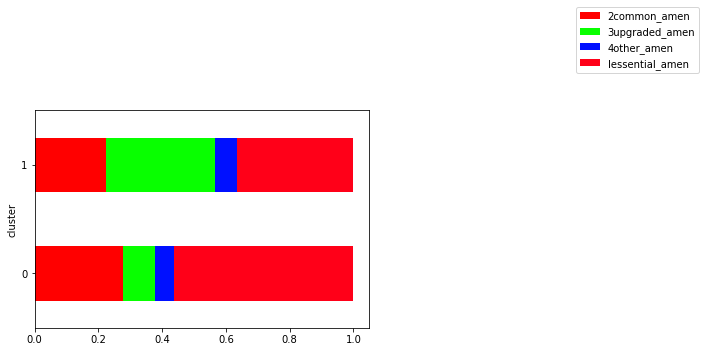

In [544]:
x_final=x_reduce 
from sklearn.cluster import KMeans
x_final.loc[:,'cluster']=KMeans(n_clusters=2).fit_predict(x_final)
pivot_cluster=x_final.pivot_table(index=['cluster'],aggfunc='sum')
pivot_cluster_percentage=pivot_cluster.div(pivot_cluster.sum(axis=1),axis=0)
pivot_cluster_percentage
pivot_cluster_percentage.plot(kind='barh',stacked=True,colormap='hsv')
plt.legend(pivot_cluster_percentage, bbox_to_anchor=(1,0.5,1,1))
x_final=x_final.reset_index()
print(x_final.groupby('cluster')[cols].agg(['mean']))
print(x_final[x_final['id']==y['id'].values[0]])

In [556]:
df2=pd.read_csv('/content/drive/MyDrive/bnb_reviews.csv')
df2=df2[~df2['comments'].isna()]
df2=df2[df2['listing_id'].isin(df_listings['id'])]
df2.to_csv('/content/drive/MyDrive/bnb_reviews.csv')

In [557]:
from nltk.stem.snowball import stopwords
import nltk
nltk.download('stopwords')
all_comments=df2['comments'].values
cmts=''
for c in all_comments:
  c=c.lower()
  cmts+=c+''
for ch in '!@#$%^&*,/\][{}|~`><-_;:':
  cmts=cmts.replace(ch,"")
words=cmts.split()
counts={}
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
for word in words:
  if word not in stopwords:
    counts[word]=counts.get(word,0)+1
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)

items=pd.DataFrame(items)
items=items.rename(columns={0:'Word',1:'Counts'})
items.to_csv('/content/drive/MyDrive/bnb_reviews.csv')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [558]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer=SentimentIntensityAnalyzer()
comments=df2.comments
def calculate_sentiment(comments):
  return(scorer.polarity_scores(comments)['compound'])
df2.loc[:, 'sentiment'] = df2['comments'].apply(lambda x: calculate_sentiment(x))
reviews=df2.copy()
df2=df2[['listing_id','sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [559]:
df2=df2.groupby('listing_id')['sentiment'].agg(['mean']).reset_index()
df2=df2.rename(columns={'mean':'sentiment_score'})

In [560]:
neg=reviews[reviews['sentiment']<0]
neg['comments'].to_csv('/content/drive/MyDrive/bnb_reviews.csv')

In [561]:
print(df2[df2['listing_id']==y['id'].values[0]])
print(df2['sentiment_score'].mean())
print(df2['sentiment_score'].max())
print(df2['sentiment_score'].min())
print(df2['sentiment_score'].std())

     listing_id  sentiment_score
845    14300858         0.637159
0.7148848955554036
0.998
-0.9646
0.3060836302454978


<function matplotlib.pyplot.show(*args, **kw)>

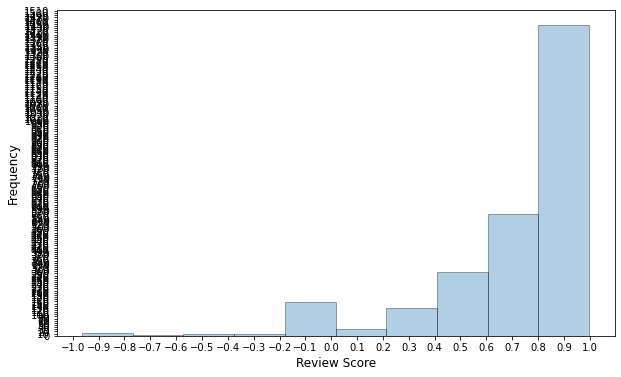

In [562]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(10,6))
plt.hist(df2['sentiment_score'], edgecolor='k', alpha=0.35)
x_major_locator=MultipleLocator(0.1)
y_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Review Score',fontsize=12)
plt.show

In [563]:
df_score=pd.merge(x_final,df2,left_on='id',right_on='listing_id')
df_score

,id,lessential_amen,2common_amen,3upgraded_amen,4other_amen,cluster,listing_id,sentiment_score
0,15262253,8,5,3,3,0,15262253,0.947300
1,3338480,7,4,1,1,0,3338480,0.000000
2,16093486,7,3,0,1,0,16093486,0.817409
3,23987680,8,5,8,2,1,23987680,0.982700
4,12977058,8,6,6,2,1,12977058,0.722700
...,...,...,...,...,...,...,...,...
2649,28731726,8,6,9,3,1,28731726,0.440400
2650,887283,8,5,6,1,1,887283,0.953800
2651,143568,8,5,7,2,1,143568,0.466400
2652,28395632,7,5,7,1,1,28395632,0.813967


In [564]:
df_score.groupby('cluster')['sentiment_score'].agg(['mean']).reset_index()

,cluster,mean
0,0,0.70574
1,1,0.72233


In [565]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [566]:
Y=df_score['sentiment_score']
X=df_score.drop(columns=['id','listing_id','sentiment_score','cluster'])
X=(X-X.min())/(X.max()-X.min())
X=X.assign(const=1)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        sentiment_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.438
Date:                Wed, 11 Jan 2023   Prob (F-statistic):              0.219
Time:                        07:34:08   Log-Likelihood:                -620.42
No. Observations:                2654   AIC:                             1251.
Df Residuals:                    2649   BIC:                             1280.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
lessential_amen    -0.0366      0.049     

In [567]:
y_index=x_final[x_final['id']==y['id'].values[0]].index
y_=(x_final-x_final.min())/(x_final.max()-x_final.min())
y_=y_.loc[y_index,:]
yp=y_.values[0][1:-1]
yp=np.append(yp,1)
model.predict(yp)

array([0.71496751])

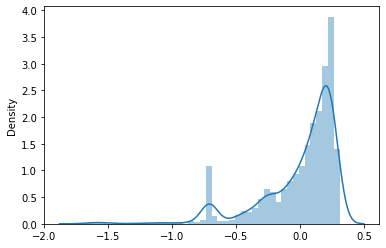

In [568]:
sns.distplot(model.resid)

In [569]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(exog=X.values,exog_idx=i)for i in range(X.shape[1])]
vif_table=pd.DataFrame({'coef_name':X.columns,'vif':np.around(vif,3)})
print(vif_table)

         coef_name     vif
0  lessential_amen   1.368
1     2common_amen   1.331
2   3upgraded_amen   1.396
3      4other_amen   1.160
4            const  43.599


In [570]:
#Price Listing by Neighborhood
df_neighbourhood = pd.DataFrame(df_listings.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False))
df_neighbourhood = df_neighbourhood.rename(columns = {'price': 'mean_price'})
top_10 = df_neighbourhood.index[:10].tolist()
df_neighbourhood.head(10)

,mean_price
neighbourhood_cleansed,
City of London,71.038462
Westminster,65.775758
Kensington and Chelsea,65.435967
Camden,65.162839
Southwark,65.095923
Enfield,65.024390
Hackney,64.887070
Wandsworth,64.780488
Lambeth,64.693920


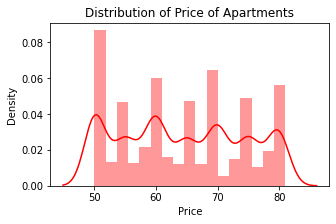

In [571]:
plt.figure(figsize=(5,3))
sns.distplot(df_listings.price,color='r')
plt.xlabel("Price")
plt.title("Distribution of Price of Apartments")
plt.show()